# Importing Libraries

In [31]:
# Importing LIbraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Reading the Data


In [32]:
# Reading the Data
dataset = pd.read_csv(r"/content/drive/MyDrive/Python_Files/Datasets/hr_employees.csv")
dataset.head()

,emp_id,department,age,experience,salary
0,Employee_49749,IT,35.0,6.0,67250.0
1,Employee_80602,Finance,27.0,0.0,52750.0
2,Employee_80602,Finance,27.0,0.0,52750.0
3,Employee_137589,IT,21.0,3.0,59500.0
4,Employee_123929,HR,33.0,13.0,84250.0


# Finding Null Values

In [33]:
dataset.isnull().sum()

,0
emp_id,53
department,16
age,20
experience,44
salary,27


In [34]:
dataset.dropna(inplace=True)
dataset.isnull().sum()

,0
emp_id,0
department,0
age,0
experience,0
salary,0


# Removing Duplicated Data

In [35]:
dataset["duplicated"] = dataset.duplicated()
dataset.head()

,emp_id,department,age,experience,salary,duplicated
0,Employee_49749,IT,35.0,6.0,67250.0,False
1,Employee_80602,Finance,27.0,0.0,52750.0,False
2,Employee_80602,Finance,27.0,0.0,52750.0,True
3,Employee_137589,IT,21.0,3.0,59500.0,False
4,Employee_123929,HR,33.0,13.0,84250.0,False


In [36]:
dataset.drop_duplicates(inplace=True)
dataset.head()

,emp_id,department,age,experience,salary,duplicated
0,Employee_49749,IT,35.0,6.0,67250.0,False
1,Employee_80602,Finance,27.0,0.0,52750.0,False
2,Employee_80602,Finance,27.0,0.0,52750.0,True
3,Employee_137589,IT,21.0,3.0,59500.0,False
4,Employee_123929,HR,33.0,13.0,84250.0,False


# Outlier Detection and Removal

<function matplotlib.pyplot.show(close=None, block=None)>

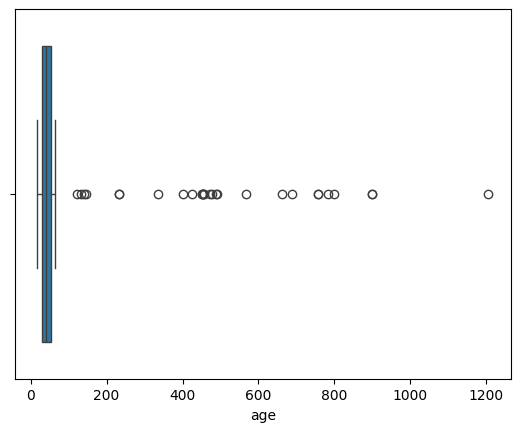

In [37]:
sns.boxplot(x = "age", data = dataset)
plt.show

<Axes: xlabel='experience'>

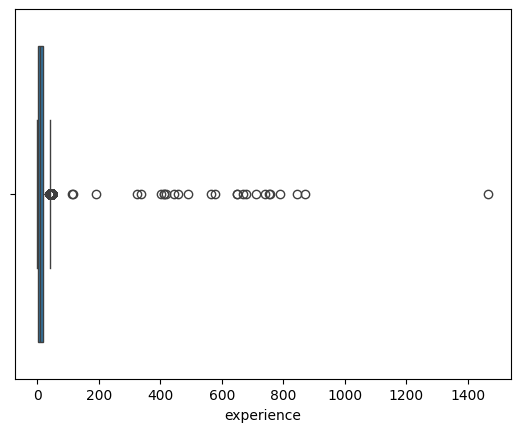

In [38]:
sns.boxplot(x = "experience", data = dataset)

<Axes: xlabel='age'>

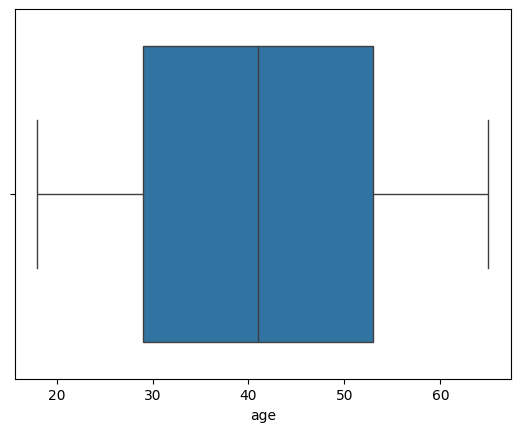

In [39]:
# removing outlier for the age column
q1 = dataset["age"].quantile(0.25)
q3 = dataset["age"].quantile(0.75)
iqr = q3 - q1
min_range = q1 - 1.5 * iqr
max_range = q3 + 1.5 * iqr
dataset = dataset[(dataset["age"] >= min_range) & (dataset["age"] <= max_range)]
sns.boxplot(x = 'age', data = dataset)

<Axes: xlabel='experience'>

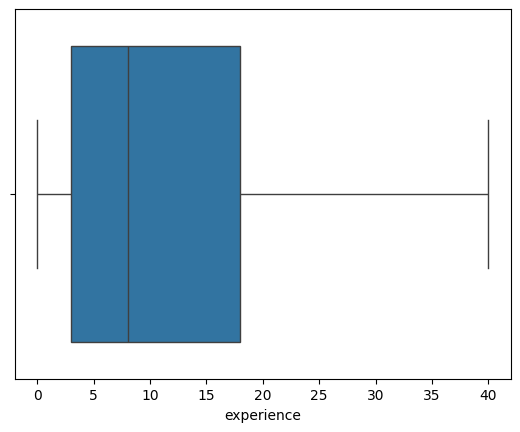

In [40]:
# removing outlier from the experience column
q1_exp = dataset["experience"].quantile(0.25)
q3_exp = dataset["experience"].quantile(0.75)
iqr_exp = q3_exp - q1_exp

min_range_exp = q1_exp - 1.5 * iqr_exp
max_range_exp = q3_exp + 1.5 * iqr_exp

dataset = dataset[(dataset["experience"] >= min_range_exp) & (dataset["experience"] <= max_range_exp)]
sns.boxplot(x = 'experience', data = dataset)

# Label Encoding

In [41]:
le = LabelEncoder()
dataset["en_department"] = le.fit_transform(dataset["department"])
dataset["department"].unique()
dataset.head(10)

,emp_id,department,age,experience,salary,duplicated,en_department
0,Employee_49749,IT,35.0,6.0,67250.0,False,3
1,Employee_80602,Finance,27.0,0.0,52750.0,False,1
2,Employee_80602,Finance,27.0,0.0,52750.0,True,1
3,Employee_137589,IT,21.0,3.0,59500.0,False,3
4,Employee_123929,HR,33.0,13.0,84250.0,False,2
5,Employee_127582,IT,20.0,0.0,52000.0,False,3
6,Employee_91383,HR,41.0,8.0,72000.0,False,2
7,Employee_63303,IT,62.0,19.0,100200.0,False,3
11,Employee_70901,Admin,31.0,4.0,61550.0,False,0
12,Employee_92246,Marketing,58.0,40.0,152400.0,False,4


# Train Test Split


In [42]:
# input output split
x = dataset[["en_department", "age", "experience"]]
y = dataset["salary"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Linear Regression


In [43]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [44]:
print(f"Accuracy of the Model is {(lr.score(x_test, y_test)*100)}%")

Accuracy of the Model is 99.97236515311914%


In [45]:
predicted_salary = lr.predict([[3, 35, 6]])
print(f"The predicted salary is: {predicted_salary[0]}")

The predicted salary is: 67148.7180864622


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
